In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('salary.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$81000.00,$73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$74628.00,$74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,$77280.00,$70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$96276.00,$96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,$84032.00,$76627.00


In [4]:
df.shape

(34218, 5)

In [5]:
df.isnull().sum()

NAME                                       0
JOB TITLE                                  0
DEPARTMENT                                 0
EMPLOYEE ANNUAL SALARY                     0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34218 entries, 0 to 34217
Data columns (total 5 columns):
NAME                                       34218 non-null object
JOB TITLE                                  34218 non-null object
DEPARTMENT                                 34218 non-null object
EMPLOYEE ANNUAL SALARY                     34218 non-null object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    34218 non-null object
dtypes: object(5)
memory usage: 1.3+ MB


In [7]:
df['DEPARTMENT'].value_counts()

POLICE                   14147
FIRE                      5085
STREETS & SAN             2193
WATER MGMNT               1834
OEMC                      1381
AVIATION                  1289
TRANSPORTN                1230
PUBLIC LIBRARY            1063
FAMILY & SUPPORT           863
HEALTH                     862
FLEET MANAGEMNT            612
GENERAL SERVICES           477
LAW                        413
REVENUE                    411
CITY COUNCIL               364
BUILDINGS                  291
COMMUNITY DEVELOPMENT      236
BUSINESS AFFAIRS           191
FINANCE                    190
CITY CLERK                 127
BOARD OF ELECTION          114
DoIT                        95
IPRA                        87
HUMAN RESOURCES             73
MAYOR'S OFFICE              73
ANIMAL CONTRL               66
CULTURAL AFFAIRS            65
ENVIRONMENT                 61
PROCUREMENT                 59
INSPECTOR GEN               54
BUDGET & MGMT               50
ADMIN HEARNG                40
DISABILI

In [8]:
df['JOB TITLE'].value_counts()

POLICE OFFICER                    10918
FIREFIGHTER                        1242
FIREFIGHTER-EMT                    1198
SERGEANT                           1177
MOTOR TRUCK DRIVER                  931
                                  ...  
CASE ANALYST - LAW                    1
MANAGER OF COMPLIANCE ANALYSIS        1
ASST PROGRAM DIR                      1
ASST AIRPORT MANAGER - MIDWAY         1
ASST DEPUTY SUPERINTENDENT            1
Name: JOB TITLE, Length: 1124, dtype: int64

In [9]:
#Removing dollar sign and coverting the last two attributes to float so that we can apply algorithms. 

In [10]:
df['EMPLOYEE ANNUAL SALARY'] = df['EMPLOYEE ANNUAL SALARY'].str.replace('$','')
df['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'] = df['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'].str.replace('$','')
df.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.00,73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.00,74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.00,70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.00,96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.00,76627.00


In [11]:
df.dtypes

NAME                                       object
JOB TITLE                                  object
DEPARTMENT                                 object
EMPLOYEE ANNUAL SALARY                     object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    object
dtype: object

In [12]:
df['EMPLOYEE ANNUAL SALARY'] = df['EMPLOYEE ANNUAL SALARY'].apply(pd.to_numeric)
df['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS']=df['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'].apply(pd.to_numeric)

In [13]:
df.dtypes

NAME                                        object
JOB TITLE                                   object
DEPARTMENT                                  object
EMPLOYEE ANNUAL SALARY                     float64
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    float64
dtype: object

# Combining sparse class

In [14]:
df['DEPARTMENT'].value_counts(normalize=True)

POLICE                   0.413437
FIRE                     0.148606
STREETS & SAN            0.064089
WATER MGMNT              0.053598
OEMC                     0.040359
AVIATION                 0.037670
TRANSPORTN               0.035946
PUBLIC LIBRARY           0.031066
FAMILY & SUPPORT         0.025221
HEALTH                   0.025191
FLEET MANAGEMNT          0.017885
GENERAL SERVICES         0.013940
LAW                      0.012070
REVENUE                  0.012011
CITY COUNCIL             0.010638
BUILDINGS                0.008504
COMMUNITY DEVELOPMENT    0.006897
BUSINESS AFFAIRS         0.005582
FINANCE                  0.005553
CITY CLERK               0.003711
BOARD OF ELECTION        0.003332
DoIT                     0.002776
IPRA                     0.002543
HUMAN RESOURCES          0.002133
MAYOR'S OFFICE           0.002133
ANIMAL CONTRL            0.001929
CULTURAL AFFAIRS         0.001900
ENVIRONMENT              0.001783
PROCUREMENT              0.001724
INSPECTOR GEN 

In [15]:
#departments which occur less than 1%(0.01) in the dataset are replaced as 'rare_var'

temp=df['DEPARTMENT'].value_counts(normalize=True)
temp_df=temp[temp>0.01].index       
    
df['DEPARTMENT']=np.where(df['DEPARTMENT'].isin(temp_df),df['DEPARTMENT'],'rare_var')

In [16]:
df['DEPARTMENT'].value_counts(normalize=True)

POLICE              0.413437
FIRE                0.148606
STREETS & SAN       0.064089
rare_var            0.058273
WATER MGMNT         0.053598
OEMC                0.040359
AVIATION            0.037670
TRANSPORTN          0.035946
PUBLIC LIBRARY      0.031066
FAMILY & SUPPORT    0.025221
HEALTH              0.025191
FLEET MANAGEMNT     0.017885
GENERAL SERVICES    0.013940
LAW                 0.012070
REVENUE             0.012011
CITY COUNCIL        0.010638
Name: DEPARTMENT, dtype: float64

In [17]:
df['JOB TITLE'].value_counts(normalize=True)

POLICE OFFICER                    0.319072
FIREFIGHTER                       0.036297
FIREFIGHTER-EMT                   0.035011
SERGEANT                          0.034397
MOTOR TRUCK DRIVER                0.027208
                                    ...   
CASE ANALYST - LAW                0.000029
MANAGER OF COMPLIANCE ANALYSIS    0.000029
ASST PROGRAM DIR                  0.000029
ASST AIRPORT MANAGER - MIDWAY     0.000029
ASST DEPUTY SUPERINTENDENT        0.000029
Name: JOB TITLE, Length: 1124, dtype: float64

In [18]:
temp=df['JOB TITLE'].value_counts(normalize=True)
temp_df=temp[temp>0.01].index       
    
df['JOB TITLE']=np.where(df['JOB TITLE'].isin(temp_df),df['JOB TITLE'],'rare_var')

In [19]:
df['JOB TITLE'].value_counts(normalize=True)

rare_var                       0.444824
POLICE OFFICER                 0.319072
FIREFIGHTER                    0.036297
FIREFIGHTER-EMT                0.035011
SERGEANT                       0.034397
MOTOR TRUCK DRIVER             0.027208
SANITATION LABORER             0.026916
CROSSING GUARD                 0.023058
TRAFFIC CONTROL AIDE-HOURLY    0.014174
LIEUTENANT                     0.013239
CONSTRUCTION LABORER           0.013005
POOL MOTOR TRUCK DRIVER        0.012800
Name: JOB TITLE, dtype: float64

In [20]:
#using enumerate() function instead of label encoder to preserve a ordinal property of higher the frequecy higher the number
#label encoder gives numbering by alphabetical order with no ordinality preservation
labels_sorted=df['DEPARTMENT'].value_counts().sort_values().index
   
labels_ordered={k:i for i,k in enumerate(labels_sorted,0)}

df['DEPARTMENT']=df['DEPARTMENT'].map(labels_ordered)

In [21]:
labels_sorted=df['JOB TITLE'].value_counts().sort_values().index
   
labels_ordered={k:i for i,k in enumerate(labels_sorted,0)}

df['JOB TITLE']=df['JOB TITLE'].map(labels_ordered)

In [22]:
#dropping name column as it is not impacting the output hence not required for model building
df=df.drop(['NAME'],axis=1)

In [23]:
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,11,11,81000.0,73862.0
1,10,15,74628.0,74628.0
2,11,4,77280.0,70174.0
3,11,11,96276.0,96276.0
4,11,11,84032.0,76627.0


# EDA

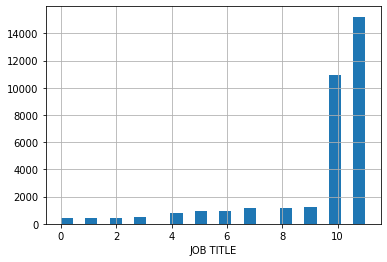

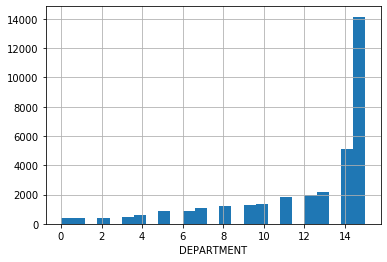

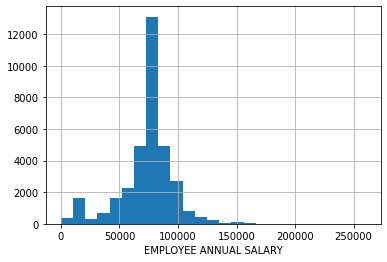

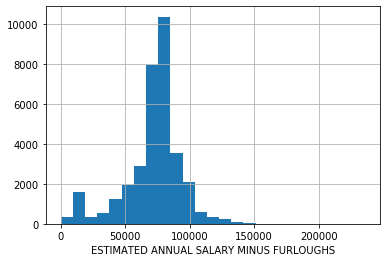

In [24]:
#checking skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

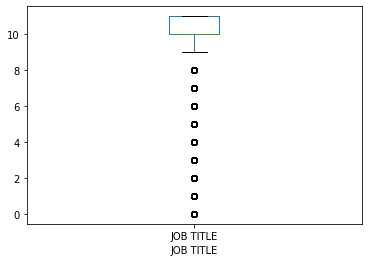

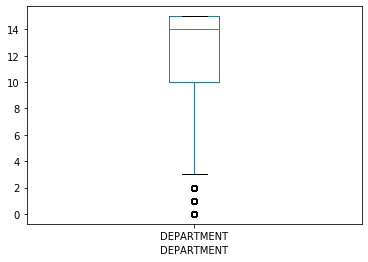

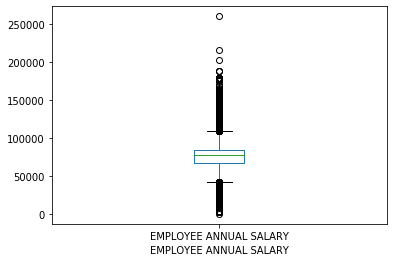

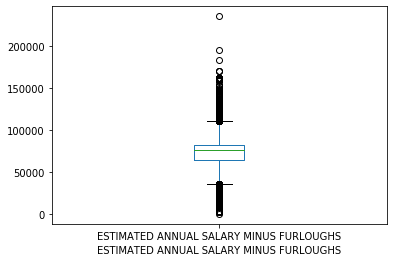

In [25]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Data Cleaning

In [ ]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [26]:
df.skew()

JOB TITLE                                 -2.053831
DEPARTMENT                                -1.366908
EMPLOYEE ANNUAL SALARY                    -0.571787
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.686903
dtype: float64

In [27]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [28]:
df.skew()

JOB TITLE                                 -2.053831
DEPARTMENT                                -1.366908
EMPLOYEE ANNUAL SALARY                    -0.571787
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.686903
dtype: float64

In [29]:
#Removing outliers now
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(34218, 4)

In [30]:
df=df[(z<3).all(axis=1)]
df.shape

(32560, 4)

In [31]:
y=df[['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS']]
X=df.drop(['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'],axis=1)

In [32]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [33]:
x.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY
0,0.659958,-0.349231,0.327986
1,0.186284,0.738067,0.028728
2,0.659958,-2.252002,0.153277
3,0.659958,-0.349231,1.045416
4,0.659958,-0.349231,0.470382


In [34]:
x.skew()

JOB TITLE                -1.953251
DEPARTMENT               -1.385221
EMPLOYEE ANNUAL SALARY   -0.904642
dtype: float64

# Applying algorithm

In [35]:
y=y
x=x

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

# 1-KNN

In [38]:
knr=KNeighborsRegressor()
maxr2_score(knr,x,y)

max_r2_score is at random_state   82   which is   0.9981139157703076


82

In [39]:
#finding best n_neighbor value for knn model
from sklearn.model_selection import GridSearchCV
n_neighbors={'n_neighbors':range(1,30)}
gknr=GridSearchCV(knr,n_neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 2}

In [40]:
knr=KNeighborsRegressor(n_neighbors=2)
r_state=maxr2_score(knr,x,y)
r_state

max_r2_score is at random_state   63   which is   0.9983954111704149


63

In [41]:
#cross validation for knn model
from sklearn.model_selection import cross_val_score
cvs_knr_mean=cross_val_score(knr,x,y,cv=10,scoring='r2').mean()
cvs_knr_std=cross_val_score(knr,x,y,cv=10,scoring='r2').mean().std()
print(cvs_knr_mean)
cvs_knr_std

0.9981777409470964


0.0

# 2-LinearRegression

In [42]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max_r2_score is at random_state   56   which is   0.9856753724504029


56

In [43]:
#no gridsearchcv.direct cross vallidation

In [44]:
#cross validation for Linear regression model
from sklearn.model_selection import cross_val_score
cvs_lr_mean=cross_val_score(lr,x,y,cv=10,scoring='r2').mean()
cvs_lr_std=cross_val_score(lr,x,y,cv=10,scoring='r2').std()
print(cvs_lr_mean)
cvs_lr_std

0.9849065658392983


0.00038278756307795345

# 3-Linear Lasso regression

In [45]:
#lasso regression only works after giving parameters in instance
from sklearn.linear_model import Lasso
las=Lasso()
parameters={'alpha':[0.1,0.01,0.001,1]}
gscv=GridSearchCV(las,parameters,cv=10)
gscv.fit(x,y)
gscv.best_params_


{'alpha': 0.001}

In [46]:
las=Lasso(alpha=0.001)
maxr2_score(las,x,y)

max_r2_score is at random_state   56   which is   0.9856753722538589


56

In [47]:
#cross validation for Linear lasso model
from sklearn.model_selection import cross_val_score
cvs_las_mean=cross_val_score(las,x,y,cv=10,scoring='r2').mean()
cvs_las_std=cross_val_score(las,x,y,cv=10,scoring='r2').std()
print(cvs_las_mean)
cvs_las_std

0.9849065658242818


0.00038278770215390175

# 4-Gradient boosting technique(GBM)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
maxr2_score(gbr,x,y)

max_r2_score is at random_state   59   which is   0.9966760122059


59

In [49]:
#takes too long for computing
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,1],'n_estimators':[10,100,500,1000]}
gscv=GridSearchCV(gbr,parameters,cv=10,n_jobs=-1)
gscv.fit(x,y)
gscv.best_params_


{'learning_rate': 1, 'n_estimators': 1000}

In [50]:
#takes too long for computing
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
maxr2_score(gbr,x,y)

max_r2_score is at random_state   75   which is   0.9966731034146055


75

In [51]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
cvs_gbr_mean=cross_val_score(gbr,x,y,cv=10,scoring='r2').mean()
cvs_gbr_std=cross_val_score(gbr,x,y,cv=10,scoring='r2').std()
print(cvs_gbr_mean)
cvs_gbr_std

0.9963466118196156


0.00032760609843818613

# 5-Adaboost

In [52]:
from sklearn.ensemble import AdaBoostRegressor
adar=AdaBoostRegressor()
maxr2_score(adar,x,y)

max_r2_score is at random_state   88   which is   0.9834137177145903


88

In [53]:
#takes too long for computing(1hour)
parameters={'learning_rate':[0.1,0.01,0.001,1],'n_estimators':[10,100,500,1000],'base_estimator':[lr,las,DecisionTreeRegressor()]}
gscv=GridSearchCV(adar,parameters,cv=10,n_jobs=-1)
gscv.fit(x,y)
gscv.best_params_


{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 10}

In [54]:
adar=AdaBoostRegressor(base_estimator=las,learning_rate=0.1,n_estimators=10)
maxr2_score(adar,x,y)

max_r2_score is at random_state   56   which is   0.9855678460107743


56

In [55]:
adar=AdaBoostRegressor(base_estimator=las,learning_rate=0.1,n_estimators=10)
cvs_adar_mean=cross_val_score(adar,x,y,cv=10,scoring='r2').mean()
cvs_adar_std=cross_val_score(adar,x,y,cv=10,scoring='r2').std()
print(cvs_adar_mean)
cvs_adar_std

0.9848559996314854


0.00040550527975477947

# Saving model

In [69]:
#From all the model tried above KNN performance is best 
#corresponding random_state=82
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=0.25)
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score=  ',r2_score(y_test,pred))

RMSE score=  887.2967092672061
r2_score=   0.9982005965272094


In [70]:
from sklearn.externals import joblib
joblib.dump(knr,'salary_knr_regression.csv')

['salary_knr_regression.csv']

In [71]:
model=joblib.load('salary_knr_regression.csv')

In [72]:
model.predict(x_test)

array([[ 73848.],
       [ 74628.],
       [ 79926.],
       ...,
       [ 74628.],
       [ 77238.],
       [102003.]])